In [1]:
import os 
import numpy as np 
import pandas as pd 
import pickle

from keras import optimizers, losses, activations, models 
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization 
from sklearn.model_selection import train_test_split
import keras
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display

SAMPLE_RATE = 22050
DURATION = 1
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

N_FFT = 1024
HOP_LENGTH = 128
N_MFCC = 15

# Prepare data

In [16]:
def show_mfcc(mfcc):
    librosa.display.specshow(mfcc)
    plt.xlabel("Time")
    plt.ylabel("MFCC")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

In [18]:
#Getting the path to the audio folders

# Change with local
TestPath ='C:\\_University\\COM3025\\Coursework\\Speech-recognition-COM3025\\data\\raw\\test\\audio\\'
TrainPath = 'C:\\_University\\COM3025\\Coursework\\Speech-recognition-COM3025\\data\\raw\\train\\audio\\'

PermitedLabels = ['yes','no','up','down','left','right','on','off','stop','go','silence','unknown']

TestSubPath = [x.name for x in os.scandir(TestPath)] # Get name of subdirectories or files
TrainSubPath = [x.name for x in os.scandir(TrainPath)] # Get name of subdirectories or files

TrainSubPath.remove('_background_noise_')#remove directory of background noises 


## Analyse data

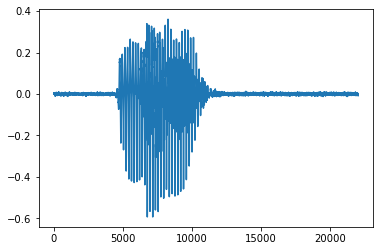

In [19]:
#Example of file load, plot and playback 
audio, sr = librosa.load(TestPath + TestSubPath[0])


plt.plot(audio) #Plotting the sound
plt.show()

IPython.display.Audio(audio,rate = sr)#Playing the sound

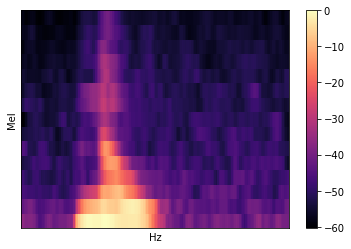

In [23]:
mel = librosa.feature.melspectrogram(audio, n_fft=N_FFT, hop_length=HOP_LENGTH, sr=SAMPLE_RATE, n_mels=N_MFCC, fmax=8000)

librosa.display.specshow(librosa.power_to_db(mel, ref=np.max))
plt.xlabel("Hz")
plt.ylabel("Mel")
plt.colorbar()
# plt.box(False)
plt.show()

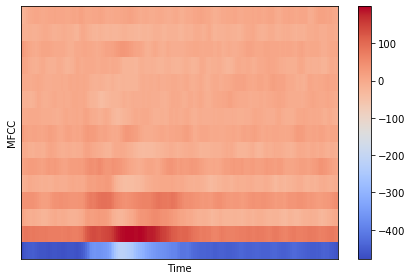

In [24]:
mfcc = librosa.feature.mfcc(audio, n_fft=N_FFT, hop_length=HOP_LENGTH, n_mfcc=N_MFCC)
show_mfcc(mfcc)

## Retrieve data

In [25]:
# One-hot encode the classes
y = list(range(len(PermitedLabels)))
y = keras.utils.to_categorical(y)

def one_hot_to_label(one_hot):
    return PermitedLabels[np.argmax(one_hot)]

def label_to_one_hot(label):
    idx = PermitedLabels.index(label)
    return y[idx]

In [26]:
#Get audio files for training and testing (now only a subset is selected)

# Data object containing MFCC information for each train file
data = {
    'mfccs': [],
    'classes': []
}

# Process all files in the train set and save their MFCC
for label in TrainSubPath:
    if label in PermitedLabels:
        
        # Add label to data
        one_hot = label_to_one_hot(label)
        
        # Retrieve file list
        fullpath = TrainPath + label
        files = [x.name for x in os.scandir(fullpath)]
        
        for file in files:
            # For each file in the label, calculate MFCC
            signal, sr = librosa.load(fullpath + "\\" + file, sr=SAMPLE_RATE)
            mfcc = librosa.feature.mfcc(signal, n_fft=N_FFT, hop_length=HOP_LENGTH, n_mfcc=N_MFCC)
            
            # Capture data
            data['mfccs'].append(mfcc)
            data["classes"].append(one_hot)
        print(f'loaded: {label}')

loaded: down
loaded: go
loaded: left
loaded: no
loaded: off
loaded: on
loaded: right
loaded: stop
loaded: up
loaded: yes


# Save/Load Data

In [27]:
data_path = 'C:\\_University\\COM3025\\Coursework\\Speech-recognition-COM3025\\data\\prepped\\data'

In [28]:
# Save
with open(data_path, 'wb') as f:
    pickle.dump(data, f)

In [30]:
# Load
with open(data_path, 'rb') as f:
    data = pickle.Unpickler(f).load()

In [31]:
# Double-check data
print(len(data['mfccs']))
print(len(data['classes']))

23682
23682


In [2]:
#extracting mel-frequency cepstral coefficients and spectral contrasts (features)
mfcc = librosa.feature.mfcc(nTrain[40][0],nTrain[40][1],n_mfcc = 40)
sc = librosa.feature.spectral_contrast(nTrain[56][0],nTrain[56][1])

NameError: name 'librosa' is not defined

In [3]:
plt.figure(figsize = (10,10))
plt.imshow(sc)
plt.figure(figsize = (10,10))
plt.imshow(mfcc)

NameError: name 'plt' is not defined

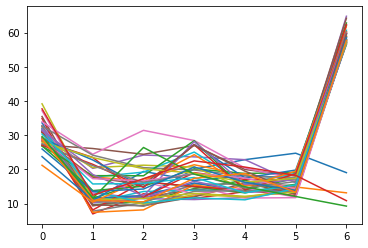

In [98]:
plt.plot(sc)
plt.show()

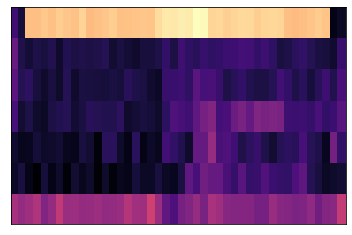

In [99]:
librosa.display.specshow(sc)